In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

from tqdm import tqdm

In [7]:
clients = pd.read_csv('usersid_booksid.csv', sep =';').fillna('')
clients['userid'] = clients['userid'].astype('int')
print(clients.shape)
clients.head()

(42680, 2)


,userid,bookid
0,233,"442948,408960"
1,288,501022
2,318,439155
3,326,"410287,462194,507507,504304,432193"
4,336,486972


In [50]:
top_2000_books = pd.Series((clients['bookid']+',').sum().split(',')).value_counts().index[:2000]
top_2000_books

Index(['438933', '445127', '439155', '416677', '440047', '416679', '416678',
       '442681', '439000', '442683',
       ...
       '401267', '504241', '424591', '412388', '501814', '476196', '410280',
       '430266', '418155', '427094'],
      dtype='object', length=2000)

In [46]:
#Т.к. в nltk опять ничего нет, у нас будут свои stopwords с матрешкой и березками
stopwords = [
u'я', u'а', u'да', u'но', u'тебе', u'мне', u'ты', u'и', u'у', u'на', u'ща', u'ага',
u'так', u'там', u'какие', u'который', u'какая', u'туда', u'давай', u'короче', u'кажется', u'вообще',
u'ну', u'не', u'чет', u'неа', u'свои', u'наше', u'хотя', u'такое', u'например', u'кароч', u'как-то',
u'нам', u'хм', u'всем', u'нет', u'да', u'оно', u'своем', u'про', u'вы', u'м', u'тд',
u'вся', u'кто-то', u'что-то', u'вам', u'это', u'эта', u'эти', u'этот', u'прям', u'либо', u'как', u'мы',
u'просто', u'блин', u'очень', u'самые', u'твоем', u'ваша', u'кстати', u'вроде', u'типа', u'пока', u'ок'
]
#костыли-костылики
def pre_filter(text):
    text = ''.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text
def cosine_sim_vectors(v1, v2):
    return cosine_similarity(v1.reshape(1, -1), v2.reshape(1, -1))[0][0]
def similarity(sentence):
    filt_sent = list(map(pre_filter, sentence))
    vectorizer = CountVectorizer().fit_transform(filt_sent)
    vec = vectorizer.toarray()
    return cosine_sim_vectors(vec[0], vec[1])

In [47]:
text1 = '''Я знаю, людям жить осталось мало.
            всем скоро предстоит свершить последний трип,
            укроемся землей, как теплым одеялом,
            всех нас одолеет птичий грипп'''

text2 = '''Владимир Путин объявил о годовщине победы над эпидемией и отдал приказ
           о начале подготовки к параду медработников'''
similarity([text1, text2])

0.0

In [48]:
text1 = '''Достоевсикй Бесы Москва 2020'''
text2 = '''Достоевский Братья Карамазовы Москва 2010'''
similarity([text1, text2])

0.22360679774997896

In [49]:
books_cat = pd.read_csv('all_books_info.csv')
books_cat.head()

,doc_id,p100a,p245a,p260a,p260b,p260c,p490a,p650a,p084a,p521a,ALL info
0,1,Устинова Татьяна Витальевна,Призрак Канта,Москва,Эксмо,2018,Татьяна Устинова. Первая среди лучших,Художественная литература ; Российский детектив,84(2Рос)6,16+,Устинова Татьяна Витальевна Призрак Канта Моск...
1,2,,Наука и жизнь,Москва,АНО Редакция журнала «Наука и жизнь»,1938-,,Наука. Науковедение,72,12+,Наука и жизнь Москва АНО Редакция журнала «Н...
2,3,,Наука и жизнь,,,2018,,Наука. Науковедение,72,12+,Наука и жизнь 2018 Наука. Науковедение...
3,4,,Наука и жизнь,,,2018,,Наука. Науковедение,72,12+,Наука и жизнь 2018 Наука. Науковедение...
4,5,,Наука и жизнь,,,2018,,Наука. Науковедение,72,12+,Наука и жизнь 2018 Наука. Науковедение...


In [56]:
books_cat_ = books_cat.set_index('doc_id').loc[top_2000_books.astype('int')]
print(books_cat_.shape)
books_cat_.head()

(2000, 10)


,p100a,p245a,p260a,p260b,p260c,p490a,p650a,p084a,p521a,ALL info
438933,,Аргументы и факты,,,2019,,Издания универсального содержания,95,,Аргументы и факты 2019 Издания универс...
445127,,Комсомольская правда,,,2019,,Издания универсального содержания,95,,Комсомольская правда 2019 Издания унив...
439155,,"Комсомольская правда. Еженедельник с ""Телепрог...",,,2019,,Издания универсального содержания,95,,"Комсомольская правда. Еженедельник с ""Телепр..."
416677,,Московский комсомолец,,,2019,,Издания универсального содержания,95,,Московский комсомолец 2019 Издания уни...
440047,,Советский спорт,,,2019,,Физическая культура и спорт. Туризм,75,,Советский спорт 2019 Физическая культу...


## Рассчитаем схожесть 2000 самых популярных изданий

In [57]:
size = 2000
books_sim = np.zeros((size, size))
for j in tqdm(np.arange(size)):
    for i in np.arange(j, size):
        if i==j:
            books_sim[i,j]=1.0
        else:
            sim = similarity([str(books_cat_.iloc[i]['ALL info']), str(books_cat_.iloc[j]['ALL info'])])
            books_sim[i, j] = sim
            books_sim[j, i] = sim

100%|████████████████████████████████████| 2000/2000 [1:02:31<00:00,  1.88s/it]


In [58]:
result = pd.DataFrame(books_sim, columns = books_cat_.index.values[:size]).set_index(books_cat_.index.values[:size])

In [60]:
result.to_csv('books_sim_2000.csv')

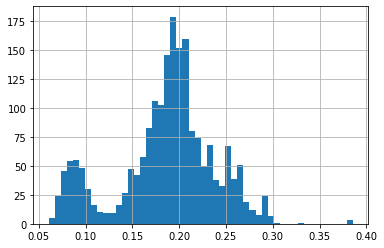

In [86]:
result[(result!=1)&(result!=0)].mean().hist(bins=50)

$CS - client similatiry$<br>
$CS(a, b)\subseteq [0, 1]$<br>
$CS(a, b)~\neq ~CS(b,a)$ Не выполняется правило треугольника!

In [62]:
def client_similatiry(BookList1, BookList2):
    BookList1, BookList2 = BookList1.split(','), BookList2.split(',')
    counter = 0
    for book in BookList1:
        if book in BookList2:
            counter += 1
    return counter/len(BookList1)

In [63]:
client_similatiry('a,b,c', 'q,w,e,a,c')

0.6666666666666666

In [64]:
client_similatiry('q,w,e,a,c', 'a,b,c')

0.4

Данная метрика отображает, насколько первое множество является подмножеством второго

In [71]:
def b_id_in_list(books):
    books = books.split(',')
    for book in books:
        if book in top_2000_books:
            return True
        else:
            return False

Читатели, у которые читали что-то из топ 2к

In [73]:
clients_ = clients[clients['bookid'].apply(lambda x: b_id_in_list(x))]
print(clients_.shape)
clients_.head()

(24807, 2)


,userid,bookid
0,233,"442948,408960"
2,318,439155
6,360,416678
9,384,455735
11,395,"442971,439804,442972,408654"


In [75]:
size = 5000
client_sim = np.zeros((size, size))
for j in tqdm(np.arange(size)):
    for i in np.arange(j, size):
        if i==j:
            client_sim[i,j]=1.0
        else:
            BookList1, BookList2 = clients_.iloc[i]['bookid'], clients_.iloc[j]['bookid']
            client_sim[i,j] = client_similatiry(BookList1, BookList2)


  2%|▋                                    | 101/5000 [03:22<2:31:00,  1.85s/it]


  4%|█▌                                   | 203/5000 [06:37<2:26:47,  1.84s/it]


  6%|██▎                                  | 305/5000 [09:48<2:20:39,  1.80s/it]


  8%|███                                  | 407/5000 [12:57<2:18:33,  1.81s/it]


 10%|███▊                                 | 509/5000 [16:01<2:10:51,  1.75s/it]


 12%|████▌                                | 611/5000 [19:00<2:02:22,  1.67s/it]


 14%|█████▎                               | 713/5000 [22:04<1:58:20,  1.66s/it]


 16%|██████                               | 815/5000 [25:01<2:15:47,  1.95s/it]


 18%|██████▊                              | 917/5000 [28:04<1:47:10,  1.57s/it]


 20%|███████▎                            | 1019/5000 [30:52<1:40:22,  1.51s/it]


 22%|████████                            | 1121/5000 [33:30<1:40:09,  1.55s/it]


 24%|████████▊                           | 1223/5000 [35:57<1:30:08,  1.43s/it]


 26%|█████████▌                          | 1325/5000 [38:31<1:25:32,  1.40s/it]


 29%|██████████▎                         | 1427/5000 [41:13<1:33:55,  1.58s/it]


 31%|███████████                         | 1529/5000 [43:29<1:15:12,  1.30s/it]


 33%|███████████▋                        | 1631/5000 [45:48<1:14:23,  1.32s/it]


 35%|████████████▍                       | 1733/5000 [47:56<1:06:38,  1.22s/it]


 37%|█████████████▏                      | 1835/5000 [50:04<1:16:35,  1.45s/it]


 39%|██████████████▋                       | 1937/5000 [52:05<59:20,  1.16s/it]


 41%|███████████████▍                      | 2039/5000 [54:07<55:12,  1.12s/it]


 43%|████████████████▎                     | 2141/5000 [56:00<51:18,  1.08s/it]


 45%|█████████████████                     | 2243/5000 [57:50<47:37,  1.04s/it]


 47%|█████████████████▊                    | 2345/5000 [59:36<43:57,  1.01it/s]


 49%|█████████████████▌                  | 2447/5000 [1:01:15<40:48,  1.04it/s]


 51%|██████████████████▎                 | 2549/5000 [1:02:51<37:36,  1.09it/s]


 53%|███████████████████                 | 2651/5000 [1:04:23<34:34,  1.13it/s]


 55%|███████████████████▊                | 2753/5000 [1:05:51<31:46,  1.18it/s]


 57%|████████████████████▌               | 2855/5000 [1:07:16<28:53,  1.24it/s]


 59%|█████████████████████▎              | 2957/5000 [1:08:36<26:02,  1.31it/s]


 61%|██████████████████████              | 3059/5000 [1:09:52<23:29,  1.38it/s]


 63%|██████████████████████▊             | 3161/5000 [1:11:04<21:10,  1.45it/s]


 65%|███████████████████████▍            | 3263/5000 [1:12:13<18:50,  1.54it/s]


 67%|████████████████████████▏           | 3365/5000 [1:13:17<16:50,  1.62it/s]


 69%|████████████████████████▉           | 3467/5000 [1:14:18<14:49,  1.72it/s]


 71%|█████████████████████████▋          | 3569/5000 [1:15:15<12:54,  1.85it/s]


 73%|██████████████████████████▍         | 3671/5000 [1:16:09<11:09,  1.98it/s]


 75%|███████████████████████████▏        | 3773/5000 [1:16:58<09:31,  2.15it/s]


 78%|███████████████████████████▉        | 3875/5000 [1:17:48<08:11,  2.29it/s]


 80%|████████████████████████████▋       | 3977/5000 [1:18:30<06:39,  2.56it/s]


 82%|█████████████████████████████▎      | 4079/5000 [1:19:08<05:25,  2.83it/s]


 84%|██████████████████████████████      | 4181/5000 [1:19:42<04:18,  3.17it/s]


 86%|██████████████████████████████▊     | 4283/5000 [1:20:12<03:18,  3.60it/s]


 88%|███████████████████████████████▌    | 4385/5000 [1:20:38<02:26,  4.21it/s]


 90%|████████████████████████████████▎   | 4487/5000 [1:21:02<01:41,  5.06it/s]


 92%|█████████████████████████████████   | 4589/5000 [1:21:20<01:05,  6.27it/s]


 94%|█████████████████████████████████▊  | 4691/5000 [1:21:34<00:37,  8.20it/s]


 97%|██████████████████████████████████▊ | 4839/5000 [1:21:48<00:10, 15.24it/s]


100%|████████████████████████████████████| 5000/5000 [1:21:53<00:00,  1.02it/s]

In [78]:
result_client = pd.DataFrame(client_sim, columns = clients_['userid'][:size]).set_index(clients_['userid'][:size])

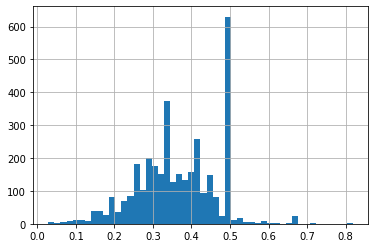

In [82]:
result_client[(result_client!=1)&(result_client!=0)].mean().hist(bins=50)

In [84]:
result_client.to_csv('clients_sim_5000.csv')